In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import matplotlib.pyplot as plt


In [2]:
counts = pd.read_json('reddit-counts.json.gz', lines=True) #import from file

In [3]:
counts = counts[counts['date'].dt.year.isin([2012,2013])] #filter out years other than 2012/2013
counts = counts[counts['subreddit'] == 'canada'] #filter out data other than canada

In [4]:
counts['day_of_week'] = counts['date'].apply(date.weekday) #get dayofweek

In [5]:
weekday = counts[counts['day_of_week'].isin([0,1,2,3,4])] #seperate weekday
weekend = counts[counts['day_of_week'].isin([5,6])] #seperate weekend

In [6]:
initial_ttest_p=stats.ttest_ind(weekday['comment_count'], weekend['comment_count']) #t-test

In [7]:
initial_weekday_normality_p=stats.normaltest(weekday['comment_count']) #weekday normal test

In [8]:
initial_weekend_normality_p=stats.normaltest(weekend['comment_count']) #weekend normal test

In [9]:
initial_levene_p=stats.levene(weekday['comment_count'],weekend['comment_count']) #equal variance test

(array([10., 26., 37., 44., 31., 27., 16.,  8.,  6.,  4.]),
 array([ 619. ,  782.5,  946. , 1109.5, 1273. , 1436.5, 1600. , 1763.5,
        1927. , 2090.5, 2254. ]),
 <a list of 10 Patch objects>)

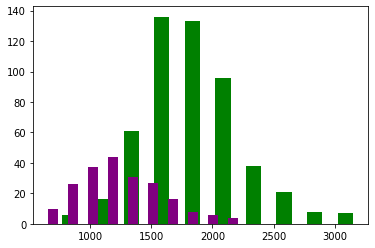

In [10]:
plt.hist(weekday['comment_count'],rwidth=0.5, color='green')
plt.hist(weekend['comment_count'],rwidth=0.5, color='purple')

In [11]:
#transform data
weekend['comment_count'] = np.sqrt(weekend['comment_count'])
weekday['comment_count'] = np.sqrt(weekday['comment_count'])

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 3., 16., 33., 36., 31., 40., 24., 14.,  5.,  7.]),
 array([24.87971061, 27.13937054, 29.39903046, 31.65869039, 33.91835032,
        36.17801025, 38.43767017, 40.6973301 , 42.95699003, 45.21664995,
        47.47630988]),
 <a list of 10 Patch objects>)

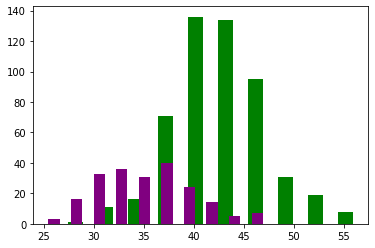

In [12]:
plt.hist(weekday['comment_count'],rwidth=0.5, color='green')
plt.hist(weekend['comment_count'],rwidth=0.5, color='purple')

In [13]:
transformed_weekday_normality_p=stats.normaltest(weekday['comment_count'])

In [14]:
transformed_weekend_normality_p=stats.normaltest(weekend['comment_count'])

In [15]:
transformed_levene_p=stats.levene(weekday['comment_count'],weekend['comment_count'])

In [16]:
#Central Limit Theorem
weekday = counts[counts['day_of_week'].isin([0,1,2,3,4])] 
weekend = counts[counts['day_of_week'].isin([5,6])] 

weekday['week_number'] = weekday['date'].apply(date.isocalendar)
weekend['week_number'] = weekend['date'].apply(date.isocalendar)

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,subreddit,comment_count,day_of_week,week_number
66,2013-03-14,canada,40.706265,3,"(2013, 11, 4)"
69,2013-07-08,canada,37.000000,0,"(2013, 28, 1)"
97,2012-07-04,canada,36.646964,2,"(2012, 27, 3)"
115,2013-03-11,canada,40.236799,0,"(2013, 11, 1)"
165,2013-09-11,canada,43.692105,2,"(2013, 37, 3)"
...,...,...,...,...,...
15357,2013-04-10,canada,44.955534,2,"(2013, 15, 3)"
15363,2013-03-19,canada,40.373258,1,"(2013, 12, 2)"
15389,2013-01-01,canada,45.967380,1,"(2013, 1, 2)"
15430,2012-10-19,canada,38.548671,4,"(2012, 42, 5)"


In [17]:
def trim(x):
    x = x[0:2]
    return x

weekday['week_number'] = weekday['week_number'].apply(trim)
weekend['week_number'] = weekend['week_number'].apply(trim)

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
weekday = weekday.groupby('week_number').aggregate('mean')
weekend = weekend.groupby('week_number').aggregate('mean')

In [19]:
weekly_weekday_normality_p=stats.normaltest(weekday['comment_count'])

In [20]:
weekly_weekend_normality_p=stats.normaltest(weekend['comment_count'])

In [21]:
weekly_levene_p=stats.levene(weekday['comment_count'],weekend['comment_count'])

In [22]:
weekly_ttest_p=stats.ttest_ind(weekday['comment_count'],weekend['comment_count'])

In [23]:
#U-test
weekday = counts[counts['day_of_week'].isin([0,1,2,3,4])] #seperate weekday
weekend = counts[counts['day_of_week'].isin([5,6])] #seperate weekend

In [24]:
utest_p=stats.mannwhitneyu(weekday['comment_count'],weekend['comment_count'],alternative='two-sided')